In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
'''
In train_data, there is only integer being indice of words for the review
Exemple : 14 may be "Hello", 85 "how", etc...

In train_label, there is only integer 0 or 1. 0 means negative, 1 means positive
'''

'\nIn train_data, there is only integer being indice of words for the review\nExemple : 14 may be "Hello", 85 "how", etc...\n\nIn train_label, there is only integer 0 or 1. 0 means negative, 1 means positive\n'

In [ ]:
len(train_data[0]) # first exemple of review contains 218 words

218

In [ ]:
# Verify that the max word ID is 9999 because we loaded the top 10 000 used words
max([max(sequence) for sequence in train_data])

9999

In [ ]:
'''
Indice 0 = Padding
Indice 1 = start of sequence
Indice 2 = Unknown
'''

'\nIndice 0 = Padding\nIndice 1 = start of sequence\nIndice 2 = Unknown\n'

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [4]:
import numpy as np

In [5]:
# Define a One-hot vector of 10 000 dimensions that put 0 if the words doesn't exist in the sequence or 1 if it does exist
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # Setting the 10 000 vector full of zero
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1 # Set 1 to specific indices of words
  return results

In [6]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32') 

In [8]:
from keras import models
from keras import layers

In [ ]:
# Defining the model with 1 input layer, 1 hidden layer and 1 output layer
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Or more explicite and modulable : 
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,
              metrics=['acc'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.6210 - acc: 0.6701 - val_loss: 0.4289 - val_acc: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3703 - acc: 0.8937 - val_loss: 0.3342 - val_acc: 0.8744
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2618 - acc: 0.9171 - val_loss: 0.2946 - val_acc: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2039 - acc: 0.9400 - val_loss: 0.2802 - val_acc: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1644 - acc: 0.9491 - val_loss: 0.2748 - val_acc: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1310 - acc: 0.9632 - val_loss: 0.2819 - val_acc: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1104 - acc: 0.9659 - val_loss: 0.3137 - val_acc: 0.8776
Epoch 8/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0934 - a

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs= range(1, 21)

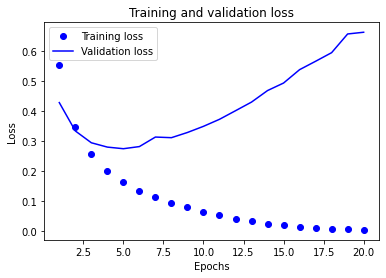

In [ ]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

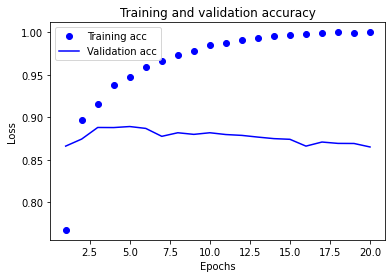

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Testing several model architectures
model = models.Sequential(
    [
     layers.Dense(16, activation='relu', input_shape=(10000,)),
     layers.Dense(16, activation='relu'),
     layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results[1]

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.5425 - accuracy: 0.7524
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2684 - accuracy: 0.9131
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1995 - accuracy: 0.9293
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2936 - accuracy: 0.8839


0.8838800191879272

In [ ]:
# Testing several model architectures
model = models.Sequential(
    [
     layers.Dense(16, activation='relu', input_shape=(10000,)),
     layers.Dense(16, activation='relu'),
     layers.Dense(16, activation='relu'),
     layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results[1]

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.5565 - accuracy: 0.7465
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2717 - accuracy: 0.9129
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1946 - accuracy: 0.9346
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3061 - accuracy: 0.8812


0.8811600208282471

In [9]:
# Testing several model architectures
model = models.Sequential(
    [
     layers.Dense(16, activation='relu', input_shape=(10000,)),
     layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results[1]

Epoch 1/4
49/49 [==============================] - 4s 11ms/step - loss: 0.5319 - accuracy: 0.7576
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2860 - accuracy: 0.9060
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2176 - accuracy: 0.9260
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2831 - accuracy: 0.8862


0.8862000107765198

In [10]:
# Testing several model architectures
model = models.Sequential(
    [
     layers.Dense(64, activation='relu', input_shape=(10000,)),
     layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results[1]

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5125 - accuracy: 0.7387
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2435 - accuracy: 0.9139
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1894 - accuracy: 0.9328
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3046 - accuracy: 0.8809


0.8808799982070923

In [12]:
  # Testing several model architectures
model = models.Sequential(
    [
     layers.Dense(32, activation='relu', input_shape=(10000,)),
     layers.Dense(32, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results[1]

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5577 - accuracy: 0.7254
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2525 - accuracy: 0.9090
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1862 - accuracy: 0.9350
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3685 - accuracy: 0.8609


0.8608800172805786